In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import requests
from bs4 import BeautifulSoup
from selenium import webdriver


import time

In [2]:
URL = 'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'
page = requests.get(URL)
page.status_code

200

In [3]:
soup = BeautifulSoup(page.content, 'html.parser')  

In [4]:
name = soup.find('div', class_ = '_4rR01T')
name.text

'vivo T2x 5G (Marine Blue, 128 GB)'

In [5]:
price = soup.find('div' , class_ = '_30jeq3 _1_WHN1')
price.text

'₹12,999'

In [6]:
rating = soup.find('div', class_ = '_3LWZlK')
rating.text

'4.4'

In [7]:
specifications = soup.find('div', class_ = 'fMghEO')
specifications

<div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">6 GB RAM | 128 GB ROM</li><li class="rgWa7D">16.71 cm (6.58 inch) Full HD+ Display</li><li class="rgWa7D">50MP + 2MP | 8MP Front Camera</li><li class="rgWa7D">5000 mAh Battery</li><li class="rgWa7D">Dimensity 6020 Processor</li><li class="rgWa7D">1 Year of Device &amp; 6 Months for Inbox Accessories</li></ul></div>

In [8]:
specs = specifications.find_all('li', class_ = 'rgWa7D')
specs

[<li class="rgWa7D">6 GB RAM | 128 GB ROM</li>,
 <li class="rgWa7D">16.71 cm (6.58 inch) Full HD+ Display</li>,
 <li class="rgWa7D">50MP + 2MP | 8MP Front Camera</li>,
 <li class="rgWa7D">5000 mAh Battery</li>,
 <li class="rgWa7D">Dimensity 6020 Processor</li>,
 <li class="rgWa7D">1 Year of Device &amp; 6 Months for Inbox Accessories</li>]

In [9]:
print(specs[0].text)

6 GB RAM | 128 GB ROM


In [10]:
product_details = soup.find_all('div', class_ = '_3pLy-c row')

In [13]:
for product in product_details:
    # name
    name = product.find('div', class_ = '_4rR01T')
    if name is None:
        print('Name not available')
    else:
        print(name.text)
        
    # price
    price = product.find('div' , class_ = '_30jeq3 _1_WHN1')
    if price is None:
        print('Price not available')
    else:
        print(price.text)
        
    # rating
    rating = product.find('div', class_ = '_3LWZlK')
    if rating is None:
        print('Rating not available')
    else:
        print(rating.text)
        
    # ratings and reviews
    ratings_reviews = product.find('span', class_ = '_2_R_DZ')
    if ratings_reviews is None:
        print('Number of Ratings and reviews not available')
    else:
        print(ratings_reviews.text)
        
    # specifications
    features = []
    specifications = product.find('div', class_ = 'fMghEO')
    specs = specifications.find_all('li', class_ = 'rgWa7D')
    for feature in specs:
        features.append(feature.text)
    print(features)
    
    print('=' * 100)
    print()

vivo T2x 5G (Marine Blue, 128 GB)
₹12,999
4.4
3,10,662 Ratings & 17,305 Reviews
['6 GB RAM | 128 GB ROM', '16.71 cm (6.58 inch) Full HD+ Display', '50MP + 2MP | 8MP Front Camera', '5000 mAh Battery', 'Dimensity 6020 Processor', '1 Year of Device & 6 Months for Inbox Accessories']

vivo T2x 5G (Glimmer Black, 128 GB)
₹12,999
4.4
3,10,662 Ratings & 17,305 Reviews
['6 GB RAM | 128 GB ROM', '16.71 cm (6.58 inch) Full HD+ Display', '50MP + 2MP | 8MP Front Camera', '5000 mAh Battery', 'Dimensity 6020 Processor', '1 Year of Device & 6 Months for Inbox Accessories']

vivo T2x 5G (Aurora Gold, 128 GB)
₹12,999
4.4
3,10,662 Ratings & 17,305 Reviews
['6 GB RAM | 128 GB ROM', '16.71 cm (6.58 inch) Full HD+ Display', '50MP + 2MP | 8MP Front Camera', '5000 mAh Battery', 'Dimensity 6020 Processor', '1 Year of Device & 6 Months for Inbox Accessories']

vivo T2x 5G (Aurora Gold, 128 GB)
₹14,999
4.3
58,498 Ratings & 3,468 Reviews
['8 GB RAM | 128 GB ROM', '16.71 cm (6.58 inch) Full HD+ Display', '50MP + 

In [14]:
titles = []
prices  = []
ratings = []
RnR = []
features = []

# Extracting product details of all products on the webpage
product_details = soup.find_all('div', class_ = '_3pLy-c row')

for product in product_details:
    # name
    name = product.find('div', class_ = '_4rR01T')
    if name is None:
        titles.append(np.nan)
    else:
        titles.append(name.text)
        
    # price
    price = product.find('div', class_ = '_30jeq3 _1_WHN1')
    if price is None:
        prices.append(np.nan)
    else:
        prices.append(price.text)
        
    # rating
    rating = product.find('div', class_ = '_3LWZlK')
    if rating is None:
        ratings.append(np.nan)
    else:
        ratings.append(rating.text)
        
    # ratings and reviews
    ratings_reviews = product.find('span', class_ = '_2_R_DZ')
    if ratings_reviews is None:
        RnR.append(np.nan)
    else:
        RnR.append(ratings_reviews.text)
        
    # specifications
    f = []
    specifications = product.find('div', class_ = 'fMghEO')
    specs = specifications.find_all('li', class_ = 'rgWa7D')
    for feature in specs:
        f.append(feature.text)
    features.append(f)

In [15]:
print(titles)
print()
print(prices)
print()
print(ratings)
print()
print(RnR)

['vivo T2x 5G (Marine Blue, 128 GB)', 'vivo T2x 5G (Glimmer Black, 128 GB)', 'vivo T2x 5G (Aurora Gold, 128 GB)', 'vivo T2x 5G (Aurora Gold, 128 GB)', 'vivo T2x 5G (Marine Blue, 128 GB)', 'vivo T2x 5G (Aurora Gold, 128 GB)', 'vivo T2x 5G (Glimmer Black, 128 GB)', 'vivo T2x 5G (Marine Blue, 128 GB)', 'POCO C55 (Forest Green, 64 GB)', 'vivo T2x 5G (Glimmer Black, 128 GB)', 'POCO C51 (Royal Blue, 64 GB)', 'APPLE iPhone 14 (Midnight, 256 GB)', 'POCO C55 (Cool Blue, 128 GB)', 'MOTOROLA G32 (Mineral Gray, 128 GB)', 'APPLE iPhone 15 (Black, 128 GB)', 'OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256 GB)', 'OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 128 GB)', 'REDMI 12 (Pastel Blue, 128 GB)', 'POCO C55 (Power Black, 64 GB)', 'OnePlus Nord CE 3 Lite 5G (Pastel Lime, 256 GB)', 'MOTOROLA g54 5G (Pearl Blue, 128 GB)', 'OnePlus Nord CE 3 Lite 5G (Pastel Lime, 128 GB)', 'APPLE iPhone 14 (Blue, 128 GB)', 'REDMI 12 (Moonstone Silver, 128 GB)']

['₹12,999', '₹12,999', '₹12,999', '₹14,999', '₹11,999', '₹1

In [16]:
df = {'Product_name' : titles,
        'Price'        : prices,
        'Rating'       : ratings,
        'No_of_RnR'    : RnR,
        'Features'     : features}

data = pd.DataFrame(df)
data.head(10)

,Product_name,Price,Rating,No_of_RnR,Features
0,"vivo T2x 5G (Marine Blue, 128 GB)","₹12,999",4.4,"3,10,662 Ratings & 17,305 Reviews","[6 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F..."
1,"vivo T2x 5G (Glimmer Black, 128 GB)","₹12,999",4.4,"3,10,662 Ratings & 17,305 Reviews","[6 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F..."
2,"vivo T2x 5G (Aurora Gold, 128 GB)","₹12,999",4.4,"3,10,662 Ratings & 17,305 Reviews","[6 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F..."
3,"vivo T2x 5G (Aurora Gold, 128 GB)","₹14,999",4.3,"58,498 Ratings & 3,468 Reviews","[8 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F..."
4,"vivo T2x 5G (Marine Blue, 128 GB)","₹11,999",4.4,"1,47,108 Ratings & 7,849 Reviews","[4 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F..."
5,"vivo T2x 5G (Aurora Gold, 128 GB)","₹11,999",4.4,"1,47,108 Ratings & 7,849 Reviews","[4 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F..."
6,"vivo T2x 5G (Glimmer Black, 128 GB)","₹11,999",4.4,"1,47,108 Ratings & 7,849 Reviews","[4 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F..."
7,"vivo T2x 5G (Marine Blue, 128 GB)","₹14,999",4.3,"58,498 Ratings & 3,468 Reviews","[8 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F..."
8,"POCO C55 (Forest Green, 64 GB)","₹6,499",4.2,"94,698 Ratings & 5,844 Reviews","[4 GB RAM | 64 GB ROM | Expandable Upto 1 TB, ..."
9,"vivo T2x 5G (Glimmer Black, 128 GB)","₹14,999",4.3,"58,498 Ratings & 3,468 Reviews","[8 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F..."


In [17]:
data['Product_name'].unique()

array(['vivo T2x 5G (Marine Blue, 128 GB)',
       'vivo T2x 5G (Glimmer Black, 128 GB)',
       'vivo T2x 5G (Aurora Gold, 128 GB)',
       'POCO C55 (Forest Green, 64 GB)', 'POCO C51 (Royal Blue, 64 GB)',
       'APPLE iPhone 14 (Midnight, 256 GB)',
       'POCO C55 (Cool Blue, 128 GB)',
       'MOTOROLA G32 (Mineral Gray, 128 GB)',
       'APPLE iPhone 15 (Black, 128 GB)',
       'OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256 GB)',
       'OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 128 GB)',
       'REDMI 12 (Pastel Blue, 128 GB)', 'POCO C55 (Power Black, 64 GB)',
       'OnePlus Nord CE 3 Lite 5G (Pastel Lime, 256 GB)',
       'MOTOROLA g54 5G (Pearl Blue, 128 GB)',
       'OnePlus Nord CE 3 Lite 5G (Pastel Lime, 128 GB)',
       'APPLE iPhone 14 (Blue, 128 GB)',
       'REDMI 12 (Moonstone Silver, 128 GB)'], dtype=object)

In [18]:
data['Price'].unique()

array(['₹12,999', '₹14,999', '₹11,999', '₹6,499', '₹5,799', '₹67,999',
       '₹7,499', '₹9,999', '₹65,999', '₹21,241', '₹19,372', '₹10,499',
       '₹21,248', '₹13,999', '₹19,203', '₹57,999'], dtype=object)

In [19]:
data['Rating'].unique()

array(['4.4', '4.3', '4.2', '4', '4.6', '4.1'], dtype=object)

In [20]:
data['Features']

0     [6 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F...
1     [6 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F...
2     [6 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F...
3     [8 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F...
4     [4 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F...
5     [4 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F...
6     [4 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F...
7     [8 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F...
8     [4 GB RAM | 64 GB ROM | Expandable Upto 1 TB, ...
9     [8 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F...
10    [4 GB RAM | 64 GB ROM | Expandable Upto 1 TB, ...
11    [256 GB ROM, 15.49 cm (6.1 inch) Super Retina ...
12    [6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,...
13    [8 GB RAM | 128 GB ROM, 16.51 cm (6.5 inch) Fu...
14    [128 GB ROM, 15.49 cm (6.1 inch) Super Retina ...
15    [8 GB RAM | 256 GB ROM, 17.07 cm (6.72 inch) D...
16    [8 GB RAM | 128 GB ROM, 17.07 cm (6.72 inch) D...
17    [6 GB RAM | 128 GB ROM | Expandable Upto 1

In [21]:
data.info()

data['Price'] = data['Price'].str.replace('₹', '')
data['Price'] = data['Price'].str.replace(',', '')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_name  24 non-null     object
 1   Price         24 non-null     object
 2   Rating        24 non-null     object
 3   No_of_RnR     24 non-null     object
 4   Features      24 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


In [22]:
data['Price'] = data['Price'].astype(np.float64)
data['Rating'] = data['Rating'].astype(np.float64)

In [23]:
data.head()

,Product_name,Price,Rating,No_of_RnR,Features
0,"vivo T2x 5G (Marine Blue, 128 GB)",12999.0,4.4,"3,10,662 Ratings & 17,305 Reviews","[6 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F..."
1,"vivo T2x 5G (Glimmer Black, 128 GB)",12999.0,4.4,"3,10,662 Ratings & 17,305 Reviews","[6 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F..."
2,"vivo T2x 5G (Aurora Gold, 128 GB)",12999.0,4.4,"3,10,662 Ratings & 17,305 Reviews","[6 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F..."
3,"vivo T2x 5G (Aurora Gold, 128 GB)",14999.0,4.3,"58,498 Ratings & 3,468 Reviews","[8 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F..."
4,"vivo T2x 5G (Marine Blue, 128 GB)",11999.0,4.4,"1,47,108 Ratings & 7,849 Reviews","[4 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F..."


In [24]:
# creating functions to get number of ratings and number of reviews
def get_ratings(text):
    if text is np.nan:
        return 0
    else:
        rating_regex = re.compile(r'([\d,\s]+)Ratings')
        ratings = rating_regex.findall(text)
        ratings = int(ratings[0].strip().replace(',',''))
        return ratings
    
def get_reviews(text):
    if text is np.nan:
        return 0
    else:
        review_regex = re.compile(r'([\d,\s]+)Reviews')
        reviews = review_regex.findall(text)
        reviews = int(reviews[0].strip().replace(',',''))
        return reviews
    
print(get_ratings('3,346 Ratings & 223 Reviews'))
print(get_reviews('3,346 Ratings & 223 Reviews'))

3346
223


In [25]:
data['No_of_ratings'] = data.No_of_RnR.apply(get_ratings)
data['No_of_reviews'] = data.No_of_RnR.apply(get_reviews)
data.drop('No_of_RnR', axis = 1, inplace = True)

In [26]:
data.head()

,Product_name,Price,Rating,Features,No_of_ratings,No_of_reviews
0,"vivo T2x 5G (Marine Blue, 128 GB)",12999.0,4.4,"[6 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F...",310662,17305
1,"vivo T2x 5G (Glimmer Black, 128 GB)",12999.0,4.4,"[6 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F...",310662,17305
2,"vivo T2x 5G (Aurora Gold, 128 GB)",12999.0,4.4,"[6 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F...",310662,17305
3,"vivo T2x 5G (Aurora Gold, 128 GB)",14999.0,4.3,"[8 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F...",58498,3468
4,"vivo T2x 5G (Marine Blue, 128 GB)",11999.0,4.4,"[4 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F...",147108,7849


In [27]:
brand_regex = re.compile(r'^\w+')
data['Brand'] = data.Product_name.apply(lambda s : brand_regex.findall(s)[0])
data.head(10)

,Product_name,Price,Rating,Features,No_of_ratings,No_of_reviews,Brand
0,"vivo T2x 5G (Marine Blue, 128 GB)",12999.0,4.4,"[6 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F...",310662,17305,vivo
1,"vivo T2x 5G (Glimmer Black, 128 GB)",12999.0,4.4,"[6 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F...",310662,17305,vivo
2,"vivo T2x 5G (Aurora Gold, 128 GB)",12999.0,4.4,"[6 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F...",310662,17305,vivo
3,"vivo T2x 5G (Aurora Gold, 128 GB)",14999.0,4.3,"[8 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F...",58498,3468,vivo
4,"vivo T2x 5G (Marine Blue, 128 GB)",11999.0,4.4,"[4 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F...",147108,7849,vivo
5,"vivo T2x 5G (Aurora Gold, 128 GB)",11999.0,4.4,"[4 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F...",147108,7849,vivo
6,"vivo T2x 5G (Glimmer Black, 128 GB)",11999.0,4.4,"[4 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F...",147108,7849,vivo
7,"vivo T2x 5G (Marine Blue, 128 GB)",14999.0,4.3,"[8 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F...",58498,3468,vivo
8,"POCO C55 (Forest Green, 64 GB)",6499.0,4.2,"[4 GB RAM | 64 GB ROM | Expandable Upto 1 TB, ...",94698,5844,POCO
9,"vivo T2x 5G (Glimmer Black, 128 GB)",14999.0,4.3,"[8 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F...",58498,3468,vivo


In [28]:
data.Features = data.Features.apply(lambda x : ','.join(x))
data.head(10)

,Product_name,Price,Rating,Features,No_of_ratings,No_of_reviews,Brand
0,"vivo T2x 5G (Marine Blue, 128 GB)",12999.0,4.4,"6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",310662,17305,vivo
1,"vivo T2x 5G (Glimmer Black, 128 GB)",12999.0,4.4,"6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",310662,17305,vivo
2,"vivo T2x 5G (Aurora Gold, 128 GB)",12999.0,4.4,"6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",310662,17305,vivo
3,"vivo T2x 5G (Aurora Gold, 128 GB)",14999.0,4.3,"8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",58498,3468,vivo
4,"vivo T2x 5G (Marine Blue, 128 GB)",11999.0,4.4,"4 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",147108,7849,vivo
5,"vivo T2x 5G (Aurora Gold, 128 GB)",11999.0,4.4,"4 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",147108,7849,vivo
6,"vivo T2x 5G (Glimmer Black, 128 GB)",11999.0,4.4,"4 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",147108,7849,vivo
7,"vivo T2x 5G (Marine Blue, 128 GB)",14999.0,4.3,"8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",58498,3468,vivo
8,"POCO C55 (Forest Green, 64 GB)",6499.0,4.2,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,17...",94698,5844,POCO
9,"vivo T2x 5G (Glimmer Black, 128 GB)",14999.0,4.3,"8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",58498,3468,vivo


In [29]:
text = data.Features[0]
processor_regex = re.compile(r'([A-Za-z0-9\s]+)Processor')

In [30]:
def get_processor(text):
    processor_regex = re.compile(r'([A-Za-z0-9\s]+)Processor')
    processor = processor_regex.findall(text)
    if len(processor) == 0:
        return np.nan
    else:
        return processor[0].strip()
    
get_processor(text)

'Dimensity 6020'

In [31]:
data['Processor'] = data.Features.apply(get_processor)
data.head(5)

,Product_name,Price,Rating,Features,No_of_ratings,No_of_reviews,Brand,Processor
0,"vivo T2x 5G (Marine Blue, 128 GB)",12999.0,4.4,"6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",310662,17305,vivo,Dimensity 6020
1,"vivo T2x 5G (Glimmer Black, 128 GB)",12999.0,4.4,"6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",310662,17305,vivo,Dimensity 6020
2,"vivo T2x 5G (Aurora Gold, 128 GB)",12999.0,4.4,"6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",310662,17305,vivo,Dimensity 6020
3,"vivo T2x 5G (Aurora Gold, 128 GB)",14999.0,4.3,"8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",58498,3468,vivo,Dimensity 6020
4,"vivo T2x 5G (Marine Blue, 128 GB)",11999.0,4.4,"4 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",147108,7849,vivo,Dimensity 6020


In [32]:
def get_ram(text):
    regex = re.compile(r'([A-Za-z0-9\s]+)RAM')
    result = regex.findall(text)
    if len(result) == 0:
        return np.nan
    else:
        return result[0].strip()
    
get_ram(text)

'6 GB'

In [33]:
data['RAM'] = data.Features.apply(get_ram)

In [34]:
data.head(5)

,Product_name,Price,Rating,Features,No_of_ratings,No_of_reviews,Brand,Processor,RAM
0,"vivo T2x 5G (Marine Blue, 128 GB)",12999.0,4.4,"6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",310662,17305,vivo,Dimensity 6020,6 GB
1,"vivo T2x 5G (Glimmer Black, 128 GB)",12999.0,4.4,"6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",310662,17305,vivo,Dimensity 6020,6 GB
2,"vivo T2x 5G (Aurora Gold, 128 GB)",12999.0,4.4,"6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",310662,17305,vivo,Dimensity 6020,6 GB
3,"vivo T2x 5G (Aurora Gold, 128 GB)",14999.0,4.3,"8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",58498,3468,vivo,Dimensity 6020,8 GB
4,"vivo T2x 5G (Marine Blue, 128 GB)",11999.0,4.4,"4 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",147108,7849,vivo,Dimensity 6020,4 GB


In [35]:
# Creating a regular expression to extract ROM
text = data.Features[0]
ROM_regex = re.compile(r'([A-Za-z0-9\s]+)ROM')

In [36]:
def get_rom(text):
    regex = re.compile(r'([A-Za-z0-9\s]+)ROM')
    result = regex.findall(text)
    if len(result) == 0:
        return np.nan
    else:
        return result[0].strip()
    
get_rom(text)

'128 GB'

In [37]:
data['ROM'] = data.Features.apply(get_rom)
data.head(5)

,Product_name,Price,Rating,Features,No_of_ratings,No_of_reviews,Brand,Processor,RAM,ROM
0,"vivo T2x 5G (Marine Blue, 128 GB)",12999.0,4.4,"6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",310662,17305,vivo,Dimensity 6020,6 GB,128 GB
1,"vivo T2x 5G (Glimmer Black, 128 GB)",12999.0,4.4,"6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",310662,17305,vivo,Dimensity 6020,6 GB,128 GB
2,"vivo T2x 5G (Aurora Gold, 128 GB)",12999.0,4.4,"6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",310662,17305,vivo,Dimensity 6020,6 GB,128 GB
3,"vivo T2x 5G (Aurora Gold, 128 GB)",14999.0,4.3,"8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",58498,3468,vivo,Dimensity 6020,8 GB,128 GB
4,"vivo T2x 5G (Marine Blue, 128 GB)",11999.0,4.4,"4 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",147108,7849,vivo,Dimensity 6020,4 GB,128 GB


In [38]:
text = data.Features[0]
battery_regex = re.compile(r'[A-Za-z0-9\s]+mAh')

In [39]:
def get_battery(text):
    regex = re.compile(r'[A-Za-z0-9\s]+mAh')
    result = regex.findall(text)
    if len(result) == 0:
        return np.nan
    else:
        return result[0].strip()
    
get_battery(text)

'5000 mAh'

In [40]:
data['Battery'] = data.Features.apply(get_battery)
data.head(5)

,Product_name,Price,Rating,Features,No_of_ratings,No_of_reviews,Brand,Processor,RAM,ROM,Battery
0,"vivo T2x 5G (Marine Blue, 128 GB)",12999.0,4.4,"6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",310662,17305,vivo,Dimensity 6020,6 GB,128 GB,5000 mAh
1,"vivo T2x 5G (Glimmer Black, 128 GB)",12999.0,4.4,"6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",310662,17305,vivo,Dimensity 6020,6 GB,128 GB,5000 mAh
2,"vivo T2x 5G (Aurora Gold, 128 GB)",12999.0,4.4,"6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",310662,17305,vivo,Dimensity 6020,6 GB,128 GB,5000 mAh
3,"vivo T2x 5G (Aurora Gold, 128 GB)",14999.0,4.3,"8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",58498,3468,vivo,Dimensity 6020,8 GB,128 GB,5000 mAh
4,"vivo T2x 5G (Marine Blue, 128 GB)",11999.0,4.4,"4 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",147108,7849,vivo,Dimensity 6020,4 GB,128 GB,5000 mAh


In [41]:
text = data.Features[0]
display_regex = re.compile(r'[0-9\s.]+inch')

In [42]:
def get_display(text):
    regex = re.compile(r'[0-9\s.]+inch')
    result = regex.findall(text)
    if len(result) == 0:
        return np.nan
    else:
        return result[0].strip()
    
get_display(text)

'6.58 inch'

In [43]:
data['Display_Size'] = data.Features.apply(get_display)
data.head()

,Product_name,Price,Rating,Features,No_of_ratings,No_of_reviews,Brand,Processor,RAM,ROM,Battery,Display_Size
0,"vivo T2x 5G (Marine Blue, 128 GB)",12999.0,4.4,"6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",310662,17305,vivo,Dimensity 6020,6 GB,128 GB,5000 mAh,6.58 inch
1,"vivo T2x 5G (Glimmer Black, 128 GB)",12999.0,4.4,"6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",310662,17305,vivo,Dimensity 6020,6 GB,128 GB,5000 mAh,6.58 inch
2,"vivo T2x 5G (Aurora Gold, 128 GB)",12999.0,4.4,"6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",310662,17305,vivo,Dimensity 6020,6 GB,128 GB,5000 mAh,6.58 inch
3,"vivo T2x 5G (Aurora Gold, 128 GB)",14999.0,4.3,"8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",58498,3468,vivo,Dimensity 6020,8 GB,128 GB,5000 mAh,6.58 inch
4,"vivo T2x 5G (Marine Blue, 128 GB)",11999.0,4.4,"4 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",147108,7849,vivo,Dimensity 6020,4 GB,128 GB,5000 mAh,6.58 inch


In [44]:
text = data.Features[0]
camera_regex = re.compile(r'[A-Za-z0-9\s\(\)\+\|]+Camera')

In [45]:
def get_camera(text):
    regex = re.compile(r'[A-Za-z0-9\s\(\)\+\|]+Camera')
    result = regex.findall(text)
    if len(result) == 0:
        return np.nan
    else:
        return result[0].strip()
    
get_camera(text)

'50MP + 2MP | 8MP Front Camera'

In [46]:
data['Camera'] = data.Features.apply(get_camera)
data.head()

,Product_name,Price,Rating,Features,No_of_ratings,No_of_reviews,Brand,Processor,RAM,ROM,Battery,Display_Size,Camera
0,"vivo T2x 5G (Marine Blue, 128 GB)",12999.0,4.4,"6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",310662,17305,vivo,Dimensity 6020,6 GB,128 GB,5000 mAh,6.58 inch,50MP + 2MP | 8MP Front Camera
1,"vivo T2x 5G (Glimmer Black, 128 GB)",12999.0,4.4,"6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",310662,17305,vivo,Dimensity 6020,6 GB,128 GB,5000 mAh,6.58 inch,50MP + 2MP | 8MP Front Camera
2,"vivo T2x 5G (Aurora Gold, 128 GB)",12999.0,4.4,"6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",310662,17305,vivo,Dimensity 6020,6 GB,128 GB,5000 mAh,6.58 inch,50MP + 2MP | 8MP Front Camera
3,"vivo T2x 5G (Aurora Gold, 128 GB)",14999.0,4.3,"8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",58498,3468,vivo,Dimensity 6020,8 GB,128 GB,5000 mAh,6.58 inch,50MP + 2MP | 8MP Front Camera
4,"vivo T2x 5G (Marine Blue, 128 GB)",11999.0,4.4,"4 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",147108,7849,vivo,Dimensity 6020,4 GB,128 GB,5000 mAh,6.58 inch,50MP + 2MP | 8MP Front Camera


In [47]:
data.drop(['Features'], axis = 1, inplace = True)
data.head()

,Product_name,Price,Rating,No_of_ratings,No_of_reviews,Brand,Processor,RAM,ROM,Battery,Display_Size,Camera
0,"vivo T2x 5G (Marine Blue, 128 GB)",12999.0,4.4,310662,17305,vivo,Dimensity 6020,6 GB,128 GB,5000 mAh,6.58 inch,50MP + 2MP | 8MP Front Camera
1,"vivo T2x 5G (Glimmer Black, 128 GB)",12999.0,4.4,310662,17305,vivo,Dimensity 6020,6 GB,128 GB,5000 mAh,6.58 inch,50MP + 2MP | 8MP Front Camera
2,"vivo T2x 5G (Aurora Gold, 128 GB)",12999.0,4.4,310662,17305,vivo,Dimensity 6020,6 GB,128 GB,5000 mAh,6.58 inch,50MP + 2MP | 8MP Front Camera
3,"vivo T2x 5G (Aurora Gold, 128 GB)",14999.0,4.3,58498,3468,vivo,Dimensity 6020,8 GB,128 GB,5000 mAh,6.58 inch,50MP + 2MP | 8MP Front Camera
4,"vivo T2x 5G (Marine Blue, 128 GB)",11999.0,4.4,147108,7849,vivo,Dimensity 6020,4 GB,128 GB,5000 mAh,6.58 inch,50MP + 2MP | 8MP Front Camera


In [48]:
columns = ['Brand', 'Product_name','Processor', 'RAM', 'ROM', 'Battery', 'Display_Size', 'Camera', 'No_of_ratings', 'No_of_reviews', 'Rating', 'Price']
data = data[columns]
data.head(10)

,Brand,Product_name,Processor,RAM,ROM,Battery,Display_Size,Camera,No_of_ratings,No_of_reviews,Rating,Price
0,vivo,"vivo T2x 5G (Marine Blue, 128 GB)",Dimensity 6020,6 GB,128 GB,5000 mAh,6.58 inch,50MP + 2MP | 8MP Front Camera,310662,17305,4.4,12999.0
1,vivo,"vivo T2x 5G (Glimmer Black, 128 GB)",Dimensity 6020,6 GB,128 GB,5000 mAh,6.58 inch,50MP + 2MP | 8MP Front Camera,310662,17305,4.4,12999.0
2,vivo,"vivo T2x 5G (Aurora Gold, 128 GB)",Dimensity 6020,6 GB,128 GB,5000 mAh,6.58 inch,50MP + 2MP | 8MP Front Camera,310662,17305,4.4,12999.0
3,vivo,"vivo T2x 5G (Aurora Gold, 128 GB)",Dimensity 6020,8 GB,128 GB,5000 mAh,6.58 inch,50MP + 2MP | 8MP Front Camera,58498,3468,4.3,14999.0
4,vivo,"vivo T2x 5G (Marine Blue, 128 GB)",Dimensity 6020,4 GB,128 GB,5000 mAh,6.58 inch,50MP + 2MP | 8MP Front Camera,147108,7849,4.4,11999.0
5,vivo,"vivo T2x 5G (Aurora Gold, 128 GB)",Dimensity 6020,4 GB,128 GB,5000 mAh,6.58 inch,50MP + 2MP | 8MP Front Camera,147108,7849,4.4,11999.0
6,vivo,"vivo T2x 5G (Glimmer Black, 128 GB)",Dimensity 6020,4 GB,128 GB,5000 mAh,6.58 inch,50MP + 2MP | 8MP Front Camera,147108,7849,4.4,11999.0
7,vivo,"vivo T2x 5G (Marine Blue, 128 GB)",Dimensity 6020,8 GB,128 GB,5000 mAh,6.58 inch,50MP + 2MP | 8MP Front Camera,58498,3468,4.3,14999.0
8,POCO,"POCO C55 (Forest Green, 64 GB)",Mediatek Helio G85,4 GB,64 GB,5000 mAh,6.71 inch,50MP Dual Rear Camera | 5MP Front Camera,94698,5844,4.2,6499.0
9,vivo,"vivo T2x 5G (Glimmer Black, 128 GB)",Dimensity 6020,8 GB,128 GB,5000 mAh,6.58 inch,50MP + 2MP | 8MP Front Camera,58498,3468,4.3,14999.0


In [214]:
data.to_csv('Phones_Assesment.csv', index = False)

In [49]:
df = pd.read_csv('Phones_Assesment.csv')
df.head()

,Brand,Product_name,Processor,RAM,ROM,Battery,Display_Size,Camera,No_of_ratings,No_of_reviews,Rating,Price
0,OPPO,"OPPO Reno 11 Pro 5G (Pearl White, 256 GB)",Mediatek Dimensity 8200,12 GB,256 GB,4600 mAh,6.7 inch,50MP + 8MP + 32MP | 32MP Front Camera,0,0,NaN,39999.0
1,OPPO,"OPPO Reno 11 5G (Wave Green, 256 GB)",Mediatek Dimensity 7050,8 GB,256 GB,5000 mAh,6.7 inch,50MP + 8MP + 32MP | 32MP Front Camera,0,0,NaN,31999.0
2,POCO,"POCO C51 (Royal Blue, 64 GB)",Helio G36,4 GB,64 GB,5000 mAh,6.52 inch,8MP Dual Rear Camera | 5MP Front Camera,161922,9021,4.0,5799.0
3,POCO,"POCO C55 (Forest Green, 64 GB)",Mediatek Helio G85,4 GB,64 GB,5000 mAh,6.71 inch,50MP Dual Rear Camera | 5MP Front Camera,93965,5800,4.2,6499.0
4,APPLE,"APPLE iPhone 15 (Black, 128 GB)",6 Core Processor,NaN,128 GB,NaN,6.1 inch,48MP + 12MP | 12MP Front Camera,3029,228,4.6,74999.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          24 non-null     object 
 1   Product_name   24 non-null     object 
 2   Processor      20 non-null     object 
 3   RAM            16 non-null     object 
 4   ROM            24 non-null     object 
 5   Battery        16 non-null     object 
 6   Display_Size   24 non-null     object 
 7   Camera         24 non-null     object 
 8   No_of_ratings  24 non-null     int64  
 9   No_of_reviews  24 non-null     int64  
 10  Rating         22 non-null     float64
 11  Price          24 non-null     float64
dtypes: float64(2), int64(2), object(8)
memory usage: 2.4+ KB


Text(0.5, 1.0, 'Brand with Price')

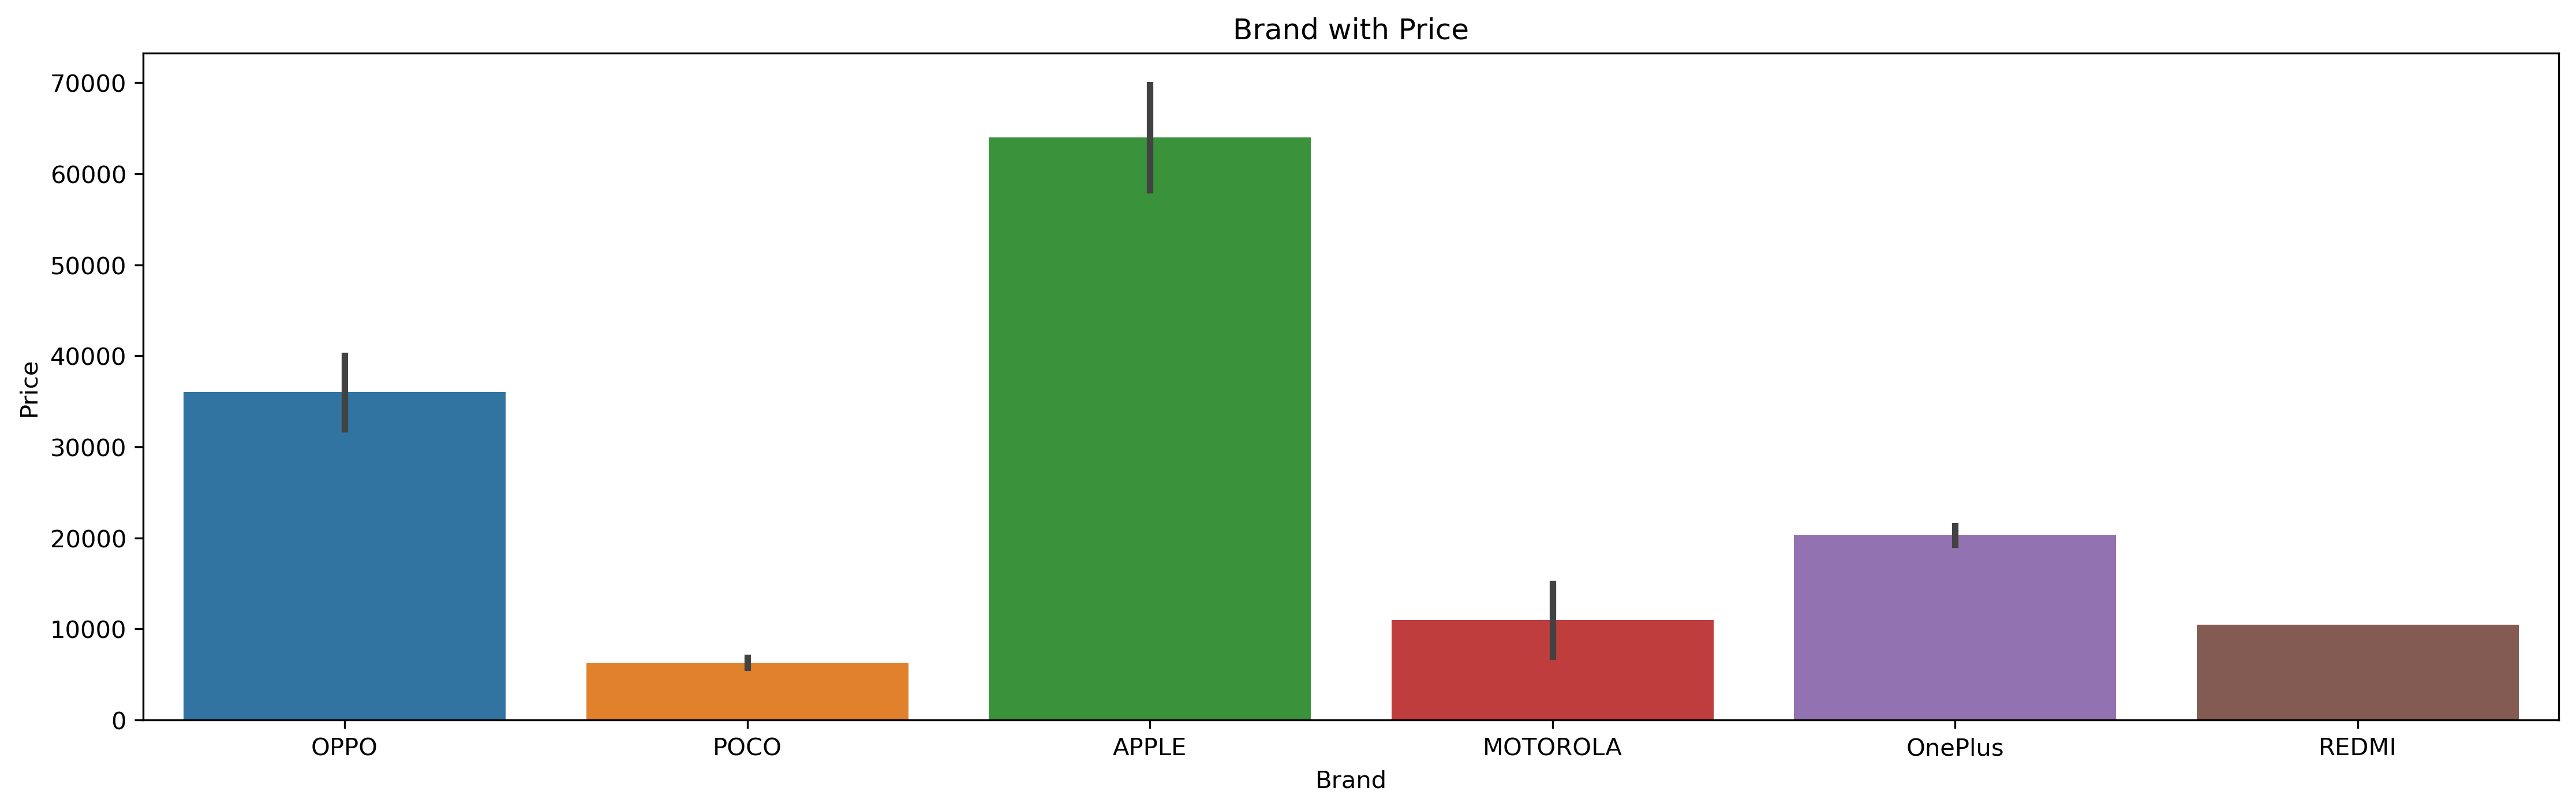

In [51]:
plt.figure(figsize = (18,5), dpi = 300)
sns.barplot(data = df , x = df.Brand , y = df.Price)
plt.title("Brand with Price")

In [52]:
df['RAM_numeric'] = df['RAM'].str.extract('(\d+)').astype(float)
df['ROM_numeric'] = df['ROM'].str.extract('(\d+)').astype(float)
df['Battery_numeric'] = df['Battery'].str.extract('(\d+)').astype(float)
df['Display_Size_numeric'] = df['Display_Size'].str.extract('(\d+\.\d+)').astype(float)

<Axes: xlabel='ROM_numeric', ylabel='Price'>

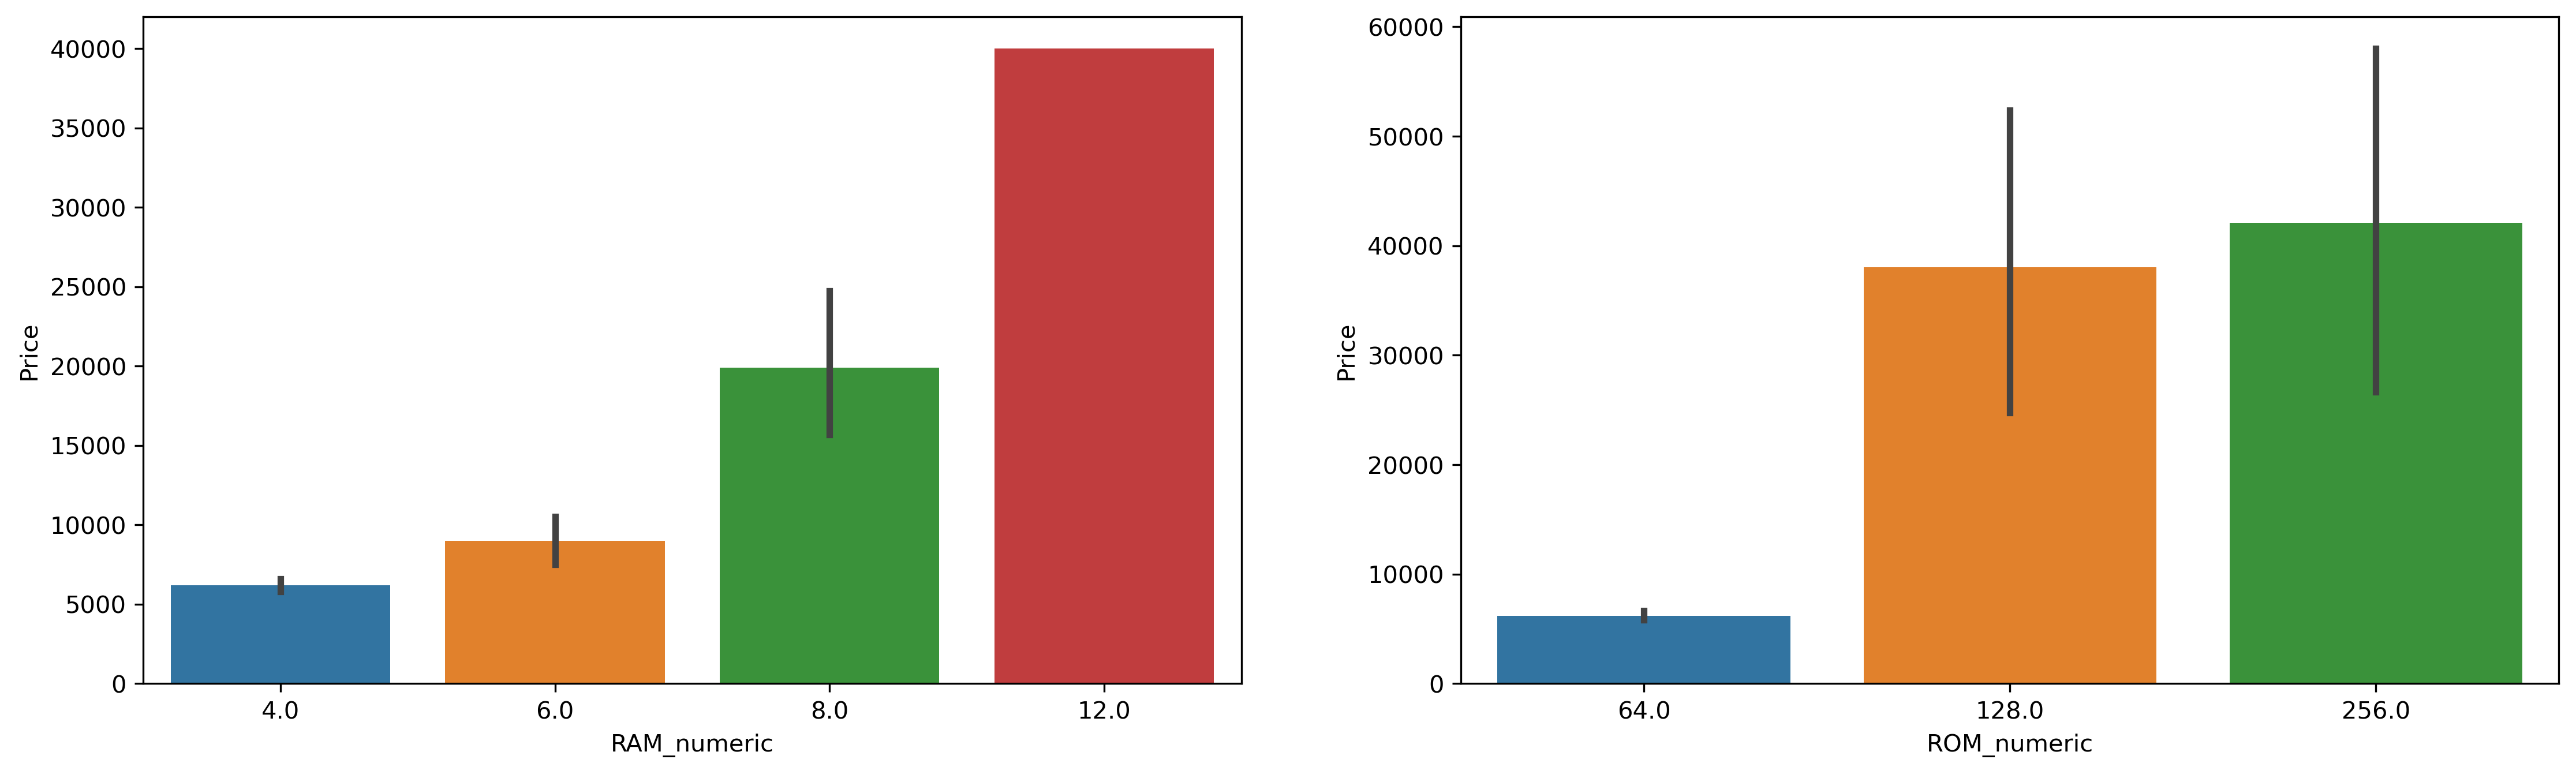

In [53]:
plt.figure(figsize = (18,5), dpi = 300)
plt.subplot(1,2,1)
sns.barplot(x = df['RAM_numeric'],  y = df['Price'])
plt.subplot(1,2,2)
sns.barplot(x = df['ROM_numeric'], y = df['Price'])

<Axes: xlabel='Display_Size_numeric', ylabel='Price'>

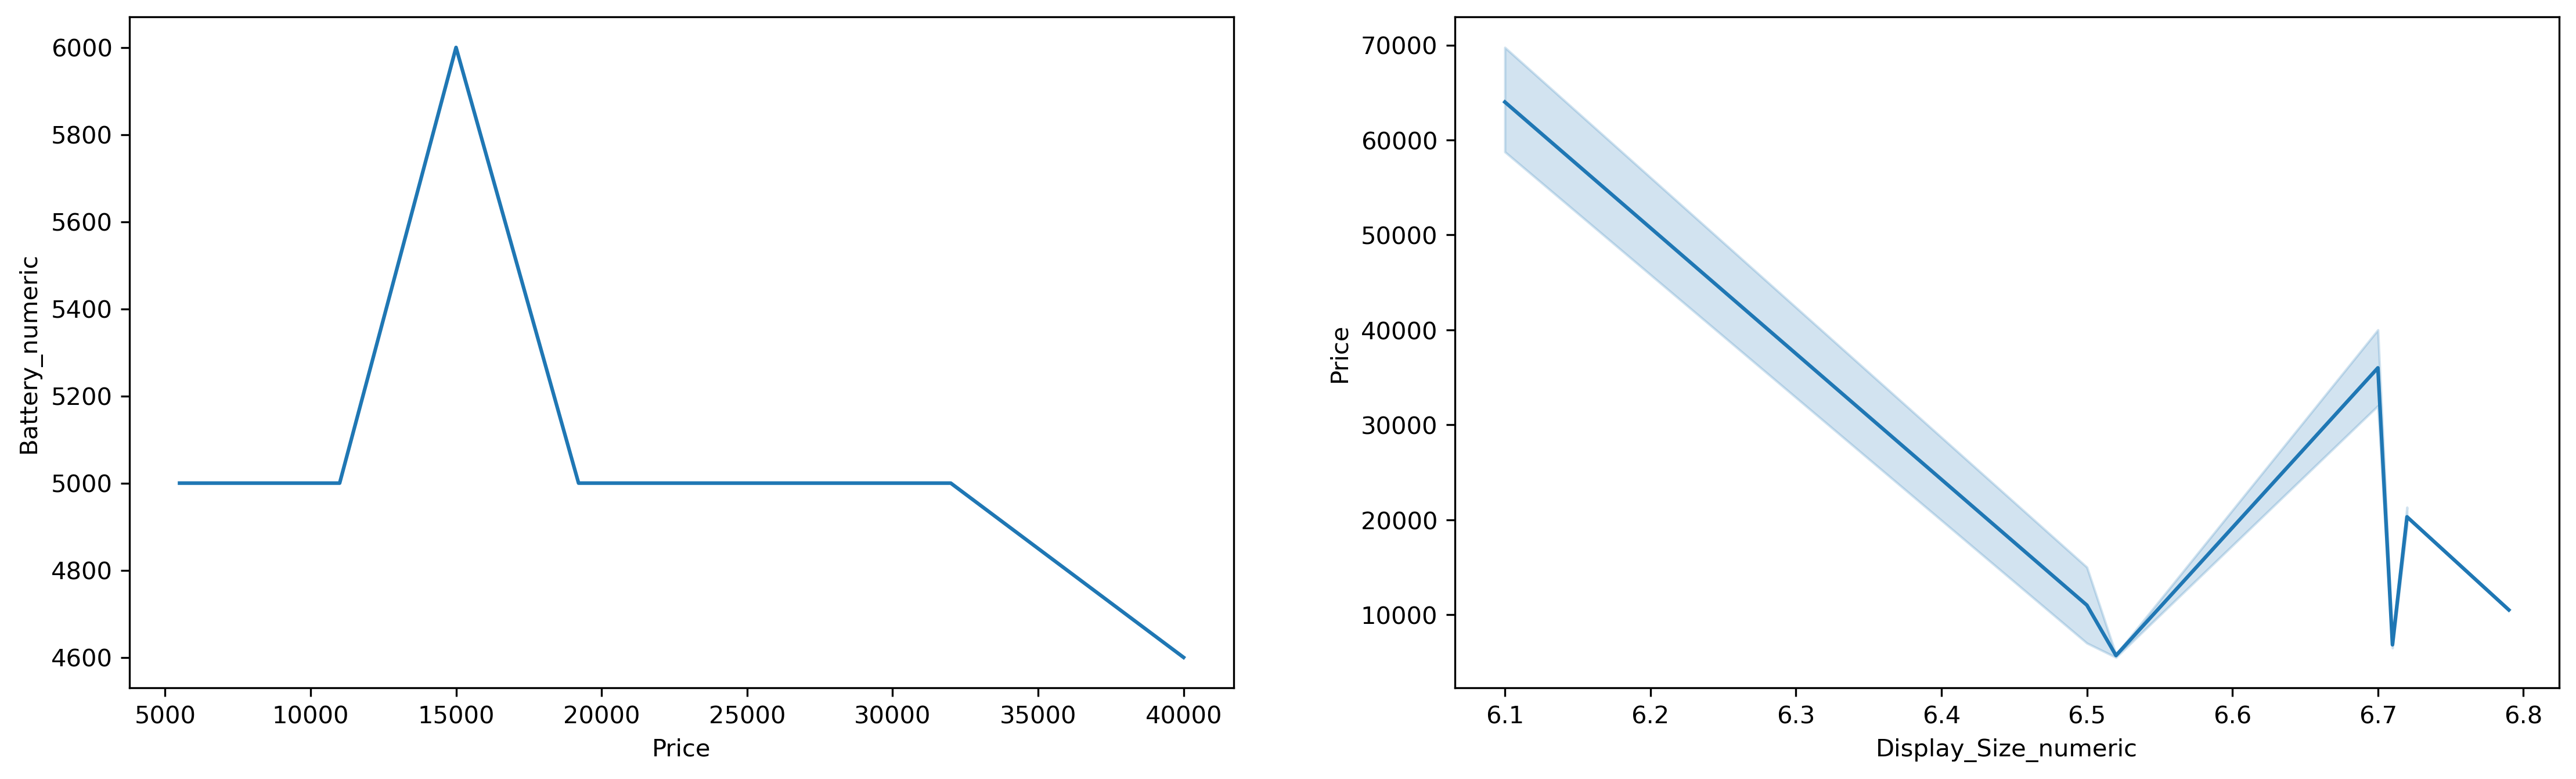

In [54]:
plt.figure(figsize = (18,5), dpi = 300)
plt.subplot(1,2,1)
sns.lineplot(y = df['Battery_numeric'], x = df['Price'])
plt.subplot(1,2,2)
sns.lineplot(x = df['Display_Size_numeric'], y = df['Price'])

<Axes: xlabel='Brand', ylabel='count'>

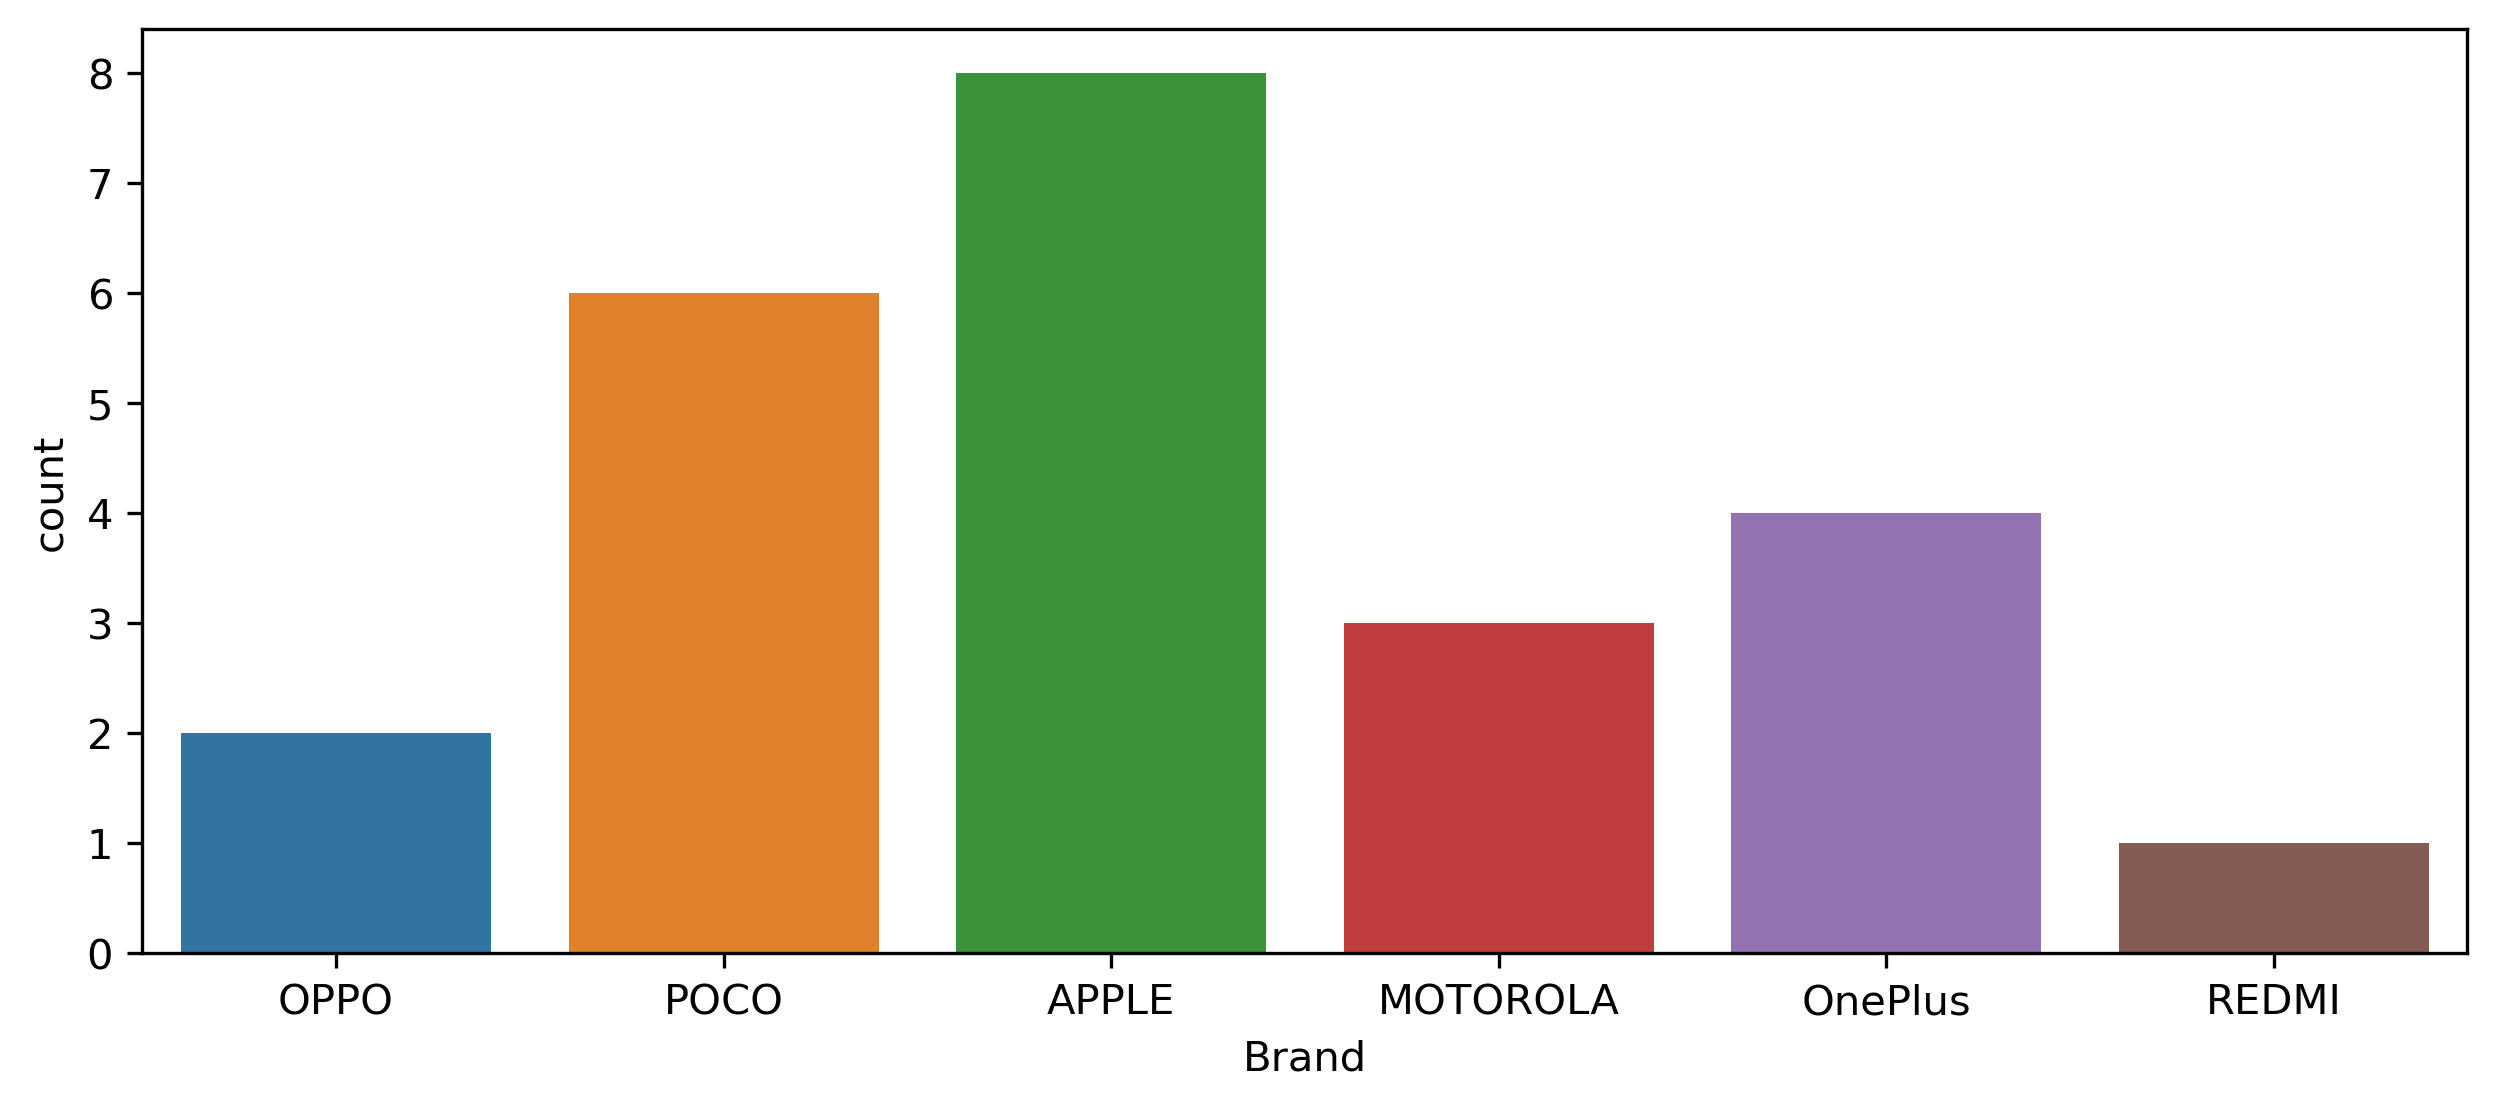

In [285]:
plt.figure(figsize = (10,4), dpi = 300)
sns.countplot(data = df , x = df['Brand'])

<Axes: xlabel='Count', ylabel='Processor'>

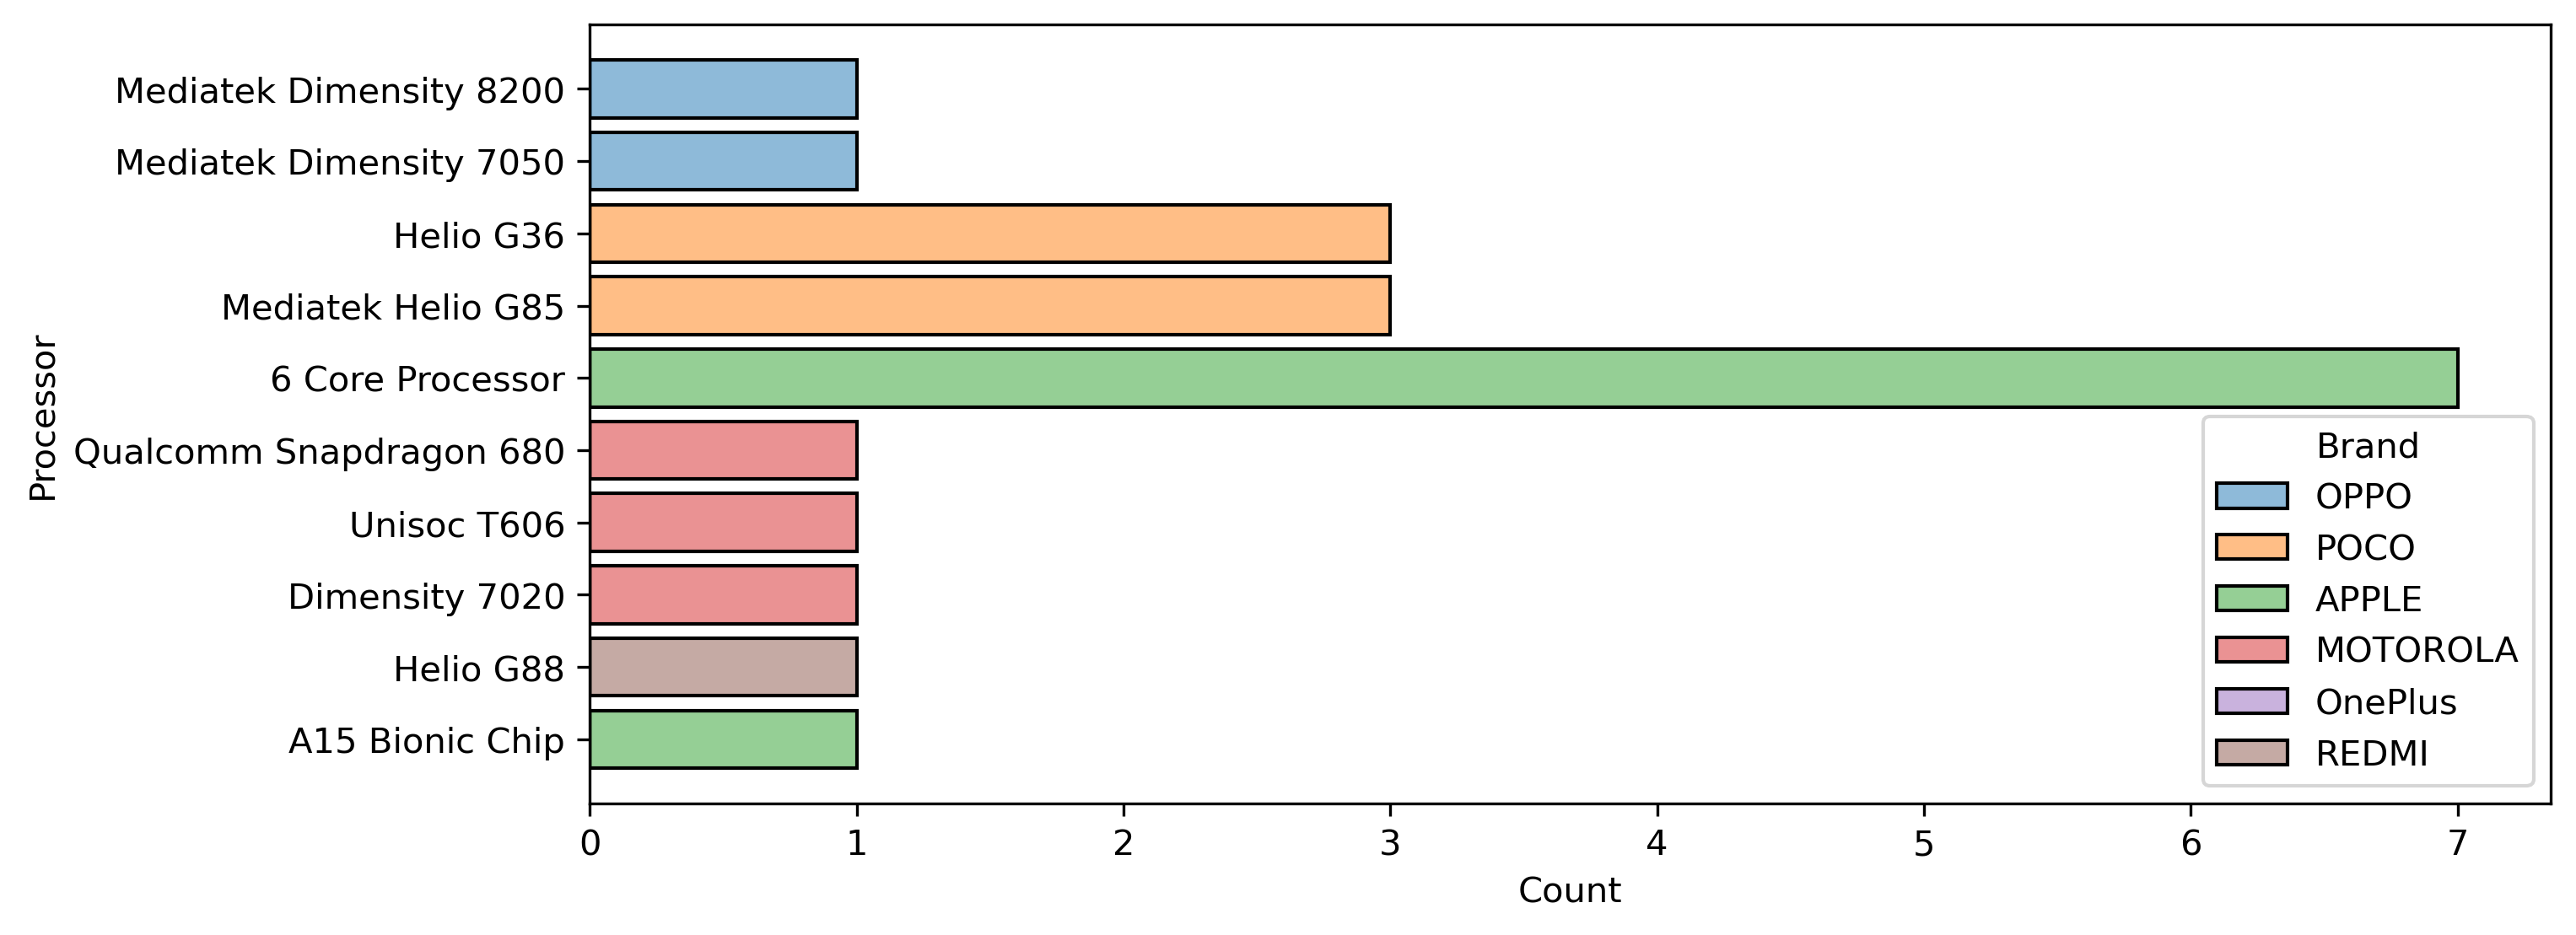

In [55]:
plt.figure(figsize=(10, 4), dpi=300)
sns.histplot(data=df, y='Processor', hue='Brand', shrink=0.8)

In [56]:
rating = df.groupby('Brand')['Rating'].value_counts()
rating

Brand     Rating
APPLE     4.6       8
MOTOROLA  4.1       2
          4.2       1
OnePlus   4.4       4
POCO      4.0       3
          4.2       2
          4.1       1
REDMI     4.2       1
Name: count, dtype: int64

<Axes: xlabel='Rating', ylabel='count'>

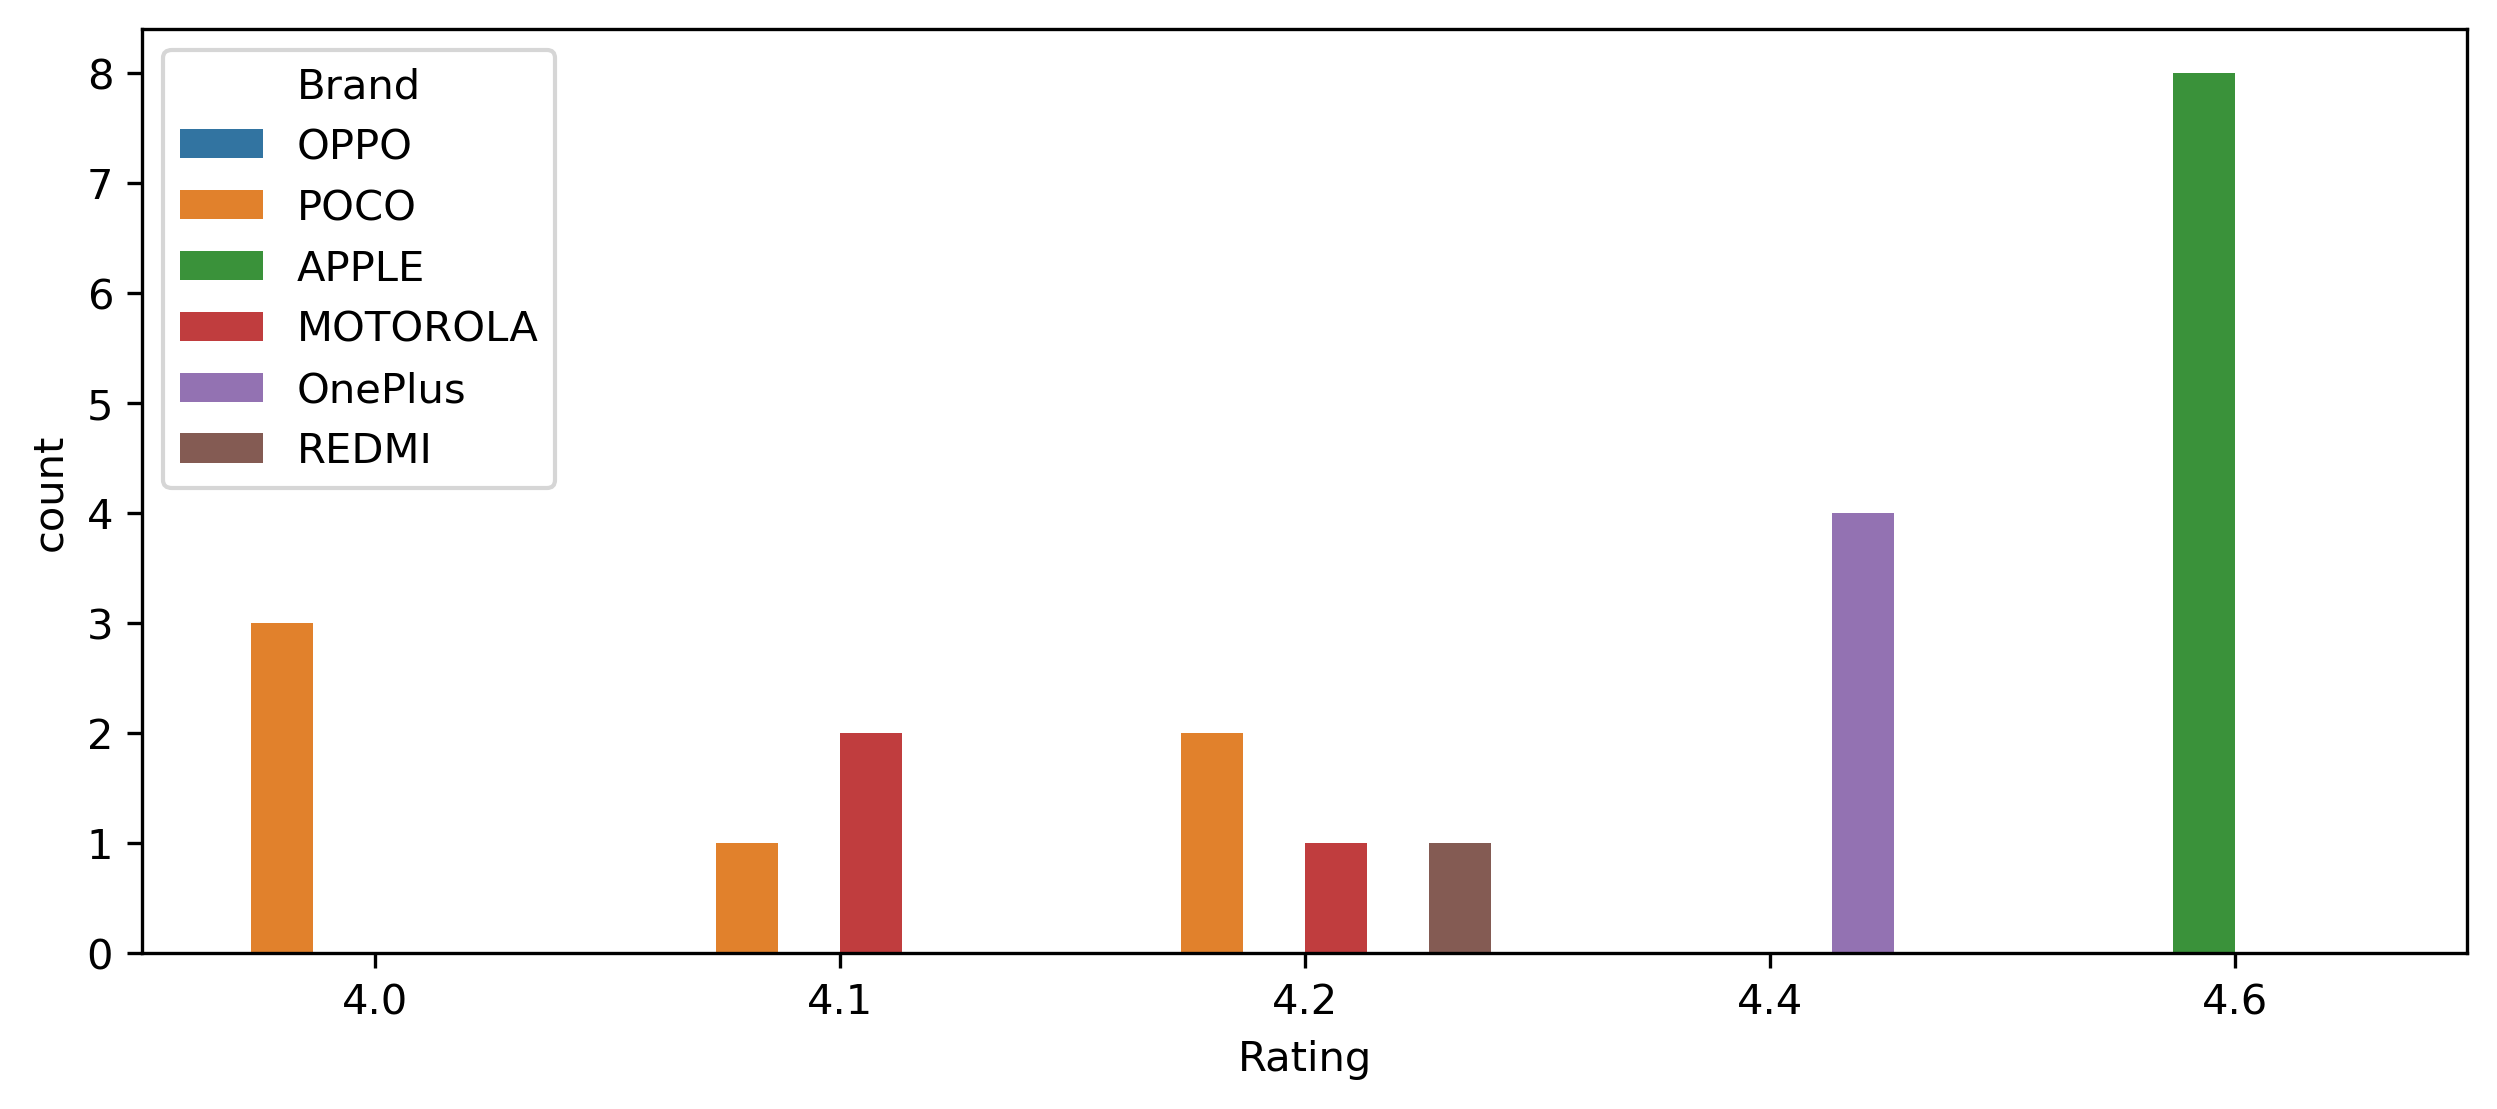

In [57]:
plt.figure(figsize=(10, 4), dpi=300)
sns.countplot(data=df, x='Rating', hue='Brand')

<Axes: xlabel='Brand', ylabel='Price'>

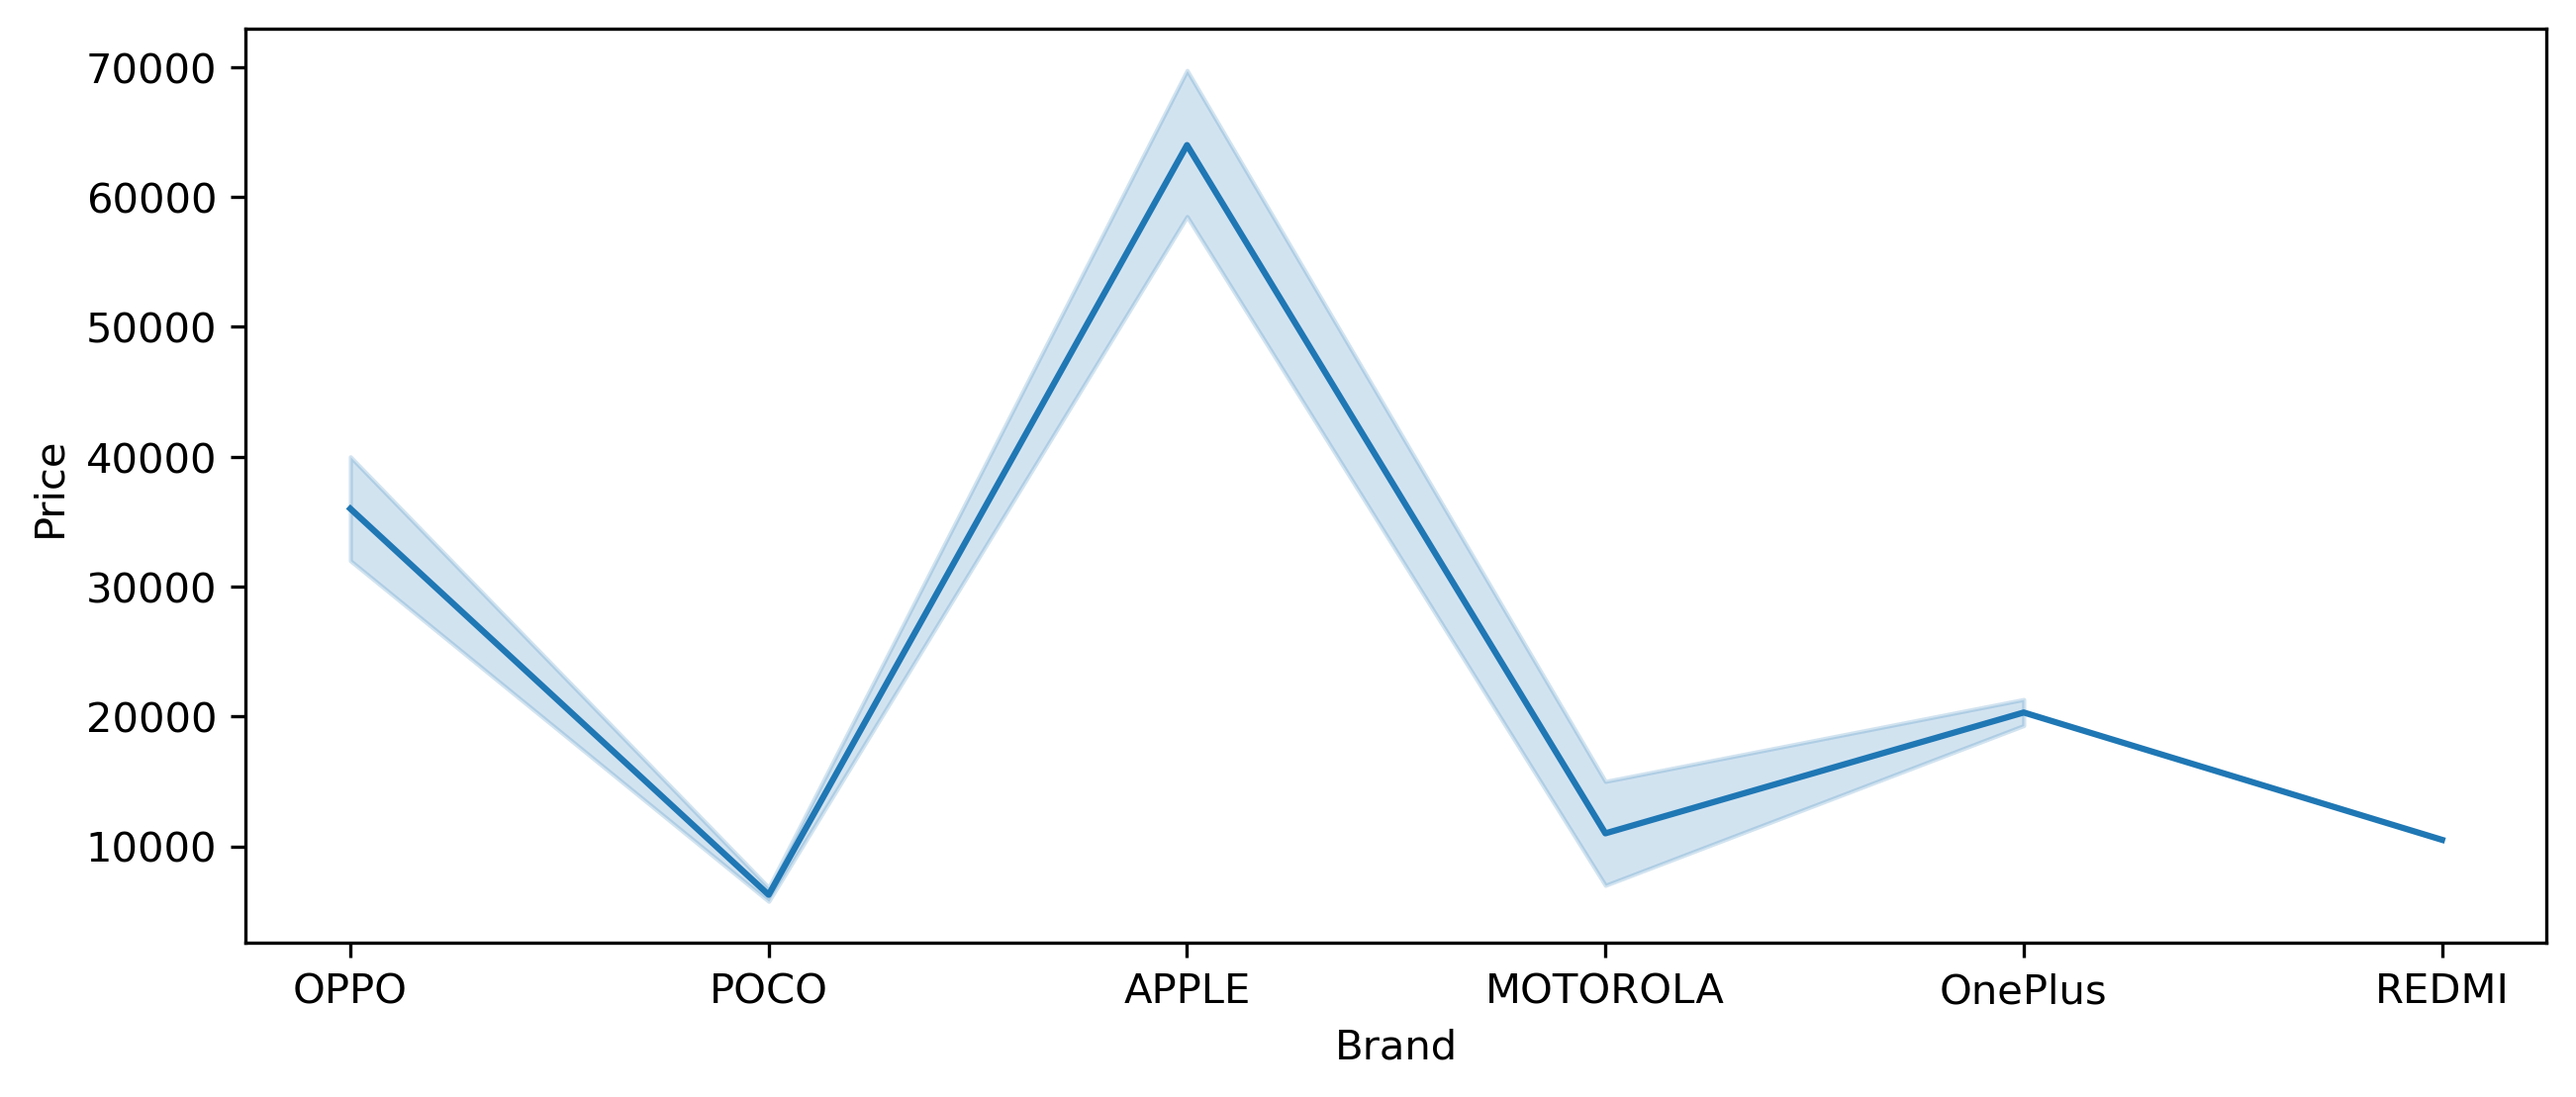

In [79]:
dfs = df['Product_name'].unique()
plt.figure(figsize=(10, 4), dpi=300)
sns.lineplot(data = df , x = df['Brand'] ,  y = df['Price'])